In [52]:
import pyslim, msprime, tskit, random
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import SVG, display

#load tree sequence file, recapitate

ts = pyslim.load("/Users/alexanderwhitwam/Desktop/memutory.trees")

rts = ts.recapitate(recombination_rate = 1e-8, Ne=500)
#ts = pyslim.SlimTreeSequence(msprime.mutate(ts, rate=1e-7))

In [53]:
ts

In [54]:
samps = random.sample(sorted(ts.individuals_alive_at(0)), 5)
snodes = []
for i in range(len(samps)):
    snodes.append(ts.individuals()[samps[i]].nodes[0])
    snodes.append(ts.individuals()[samps[i]].nodes[1])

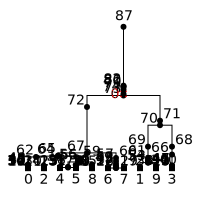

In [65]:
sts = ts.simplify(snodes, keep_unary=True)
srts = ts.simplify(snodes, keep_unary=True)
muted = sts.first()
mutedr = srts.first()
SVG(muted.draw_svg())

In [66]:
simpns = []
for i in sts.individuals_alive_at(0):
    for n in sts.individual(i).nodes:
        simpns.append(n)

In [67]:
rsimpns = []
for i in srts.individuals_alive_at(0):
    for n in srts.individual(i).nodes:
        rsimpns.append(n)

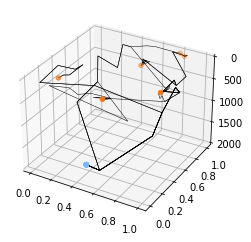

In [75]:
lists, simpis, ancestors = [], [], [] #lists of xyz coordinates for each individual, 
                                      #descendant & ancestral individuals in simplified ts
for n in simpns:
    ind = sts.node(n).individual
    if ind not in simpis:
        simpis.append(ind)
    x = [sts.individual(ind).location[0]]
    y = [sts.individual(ind).location[1]]
    z = [sts.individual(ind).time]
    while muted.parent(n) != tskit.NULL and sts.node(muted.parent(n)).time < 2000:
        n = muted.parent(n)
        indi = sts.node(n).individual
        if indi != -1:
            x.append(sts.individual(indi).location[0])
            y.append(sts.individual(indi).location[1])
            z.append(sts.individual(indi).time)
    ancestors.append(sts.node(n).individual)
    lists.append([x, y, z])
    
xan, yan, zan = [], [], []
for i in ancestors:
    xan.append(sts.individual(i).location[0])
    yan.append(sts.individual(i).location[1])
    zan.append(sts.individual(i).time)
    
xde, yde, zde = [], [], []
for i in simpis:
    xde.append(sts.individual(i).location[0])
    yde.append(sts.individual(i).location[1])
    zde.append(sts.individual(i).time)
    
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_zlim([2000, 0])

for i in range(len(lists)):
    ax.plot(lists[i][0], lists[i][1], lists[i][2], color="black", linewidth=0.5)

ax.scatter3D(xan, yan, zan, color="xkcd:sky blue")
ax.scatter3D(xde, yde, zde, color="xkcd:orange")

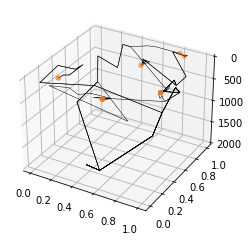

In [76]:
rlists, rsimpis, rancestors = [], [], [] #lists of xyz coordinates for each individual, 
                                      #descendant & ancestral individuals in simplified ts
for n in rsimpns:
    ind = srts.node(n).individual
    if ind not in rsimpis:
        rsimpis.append(ind)
    x = [srts.individual(ind).location[0]]
    y = [srts.individual(ind).location[1]]
    z = [srts.individual(ind).time]
    while mutedr.parent(n) != tskit.NULL:
        n = mutedr.parent(n)
        indi = srts.node(n).individual
        if indi != -1:
            x.append(srts.individual(indi).location[0])
            y.append(srts.individual(indi).location[1])
            z.append(srts.individual(indi).time)
    if srts.node(n).time < 2000:
        rancestors.append(srts.node(n).individual)
    rlists.append([x, y, z])
    
rxan, ryan, rzan = [], [], []
for i in rancestors:
    rxan.append(srts.individual(i).location[0])
    ryan.append(srts.individual(i).location[1])
    rzan.append(srts.individual(i).time)
    
rxde, ryde, rzde = [], [], []
for i in rsimpis:
    rxde.append(srts.individual(i).location[0])
    ryde.append(srts.individual(i).location[1])
    rzde.append(srts.individual(i).time)
    
rfig = plt.figure()
rax = rfig.add_subplot(projection='3d')
rax.set_zlim([2000, 0])

for i in range(len(rlists)):
    rax.plot(rlists[i][0], rlists[i][1], rlists[i][2], color="black", linewidth=0.5)

rax.scatter3D(rxan, ryan, rzan, color="xkcd:sky blue")
rax.scatter3D(rxde, ryde, rzde, color="xkcd:orange")
plt.show()

In [50]:
muted